In [ ]:
import pandas as pd
import numpy as np
cancer = pd.read_csv("/content/Thyroid_Diff.csv")
cancer.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Thyroid_Diff.csv'

In [ ]:
columns_to_encode = ['Age','Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cancer['Recurred'] = label_encoder.fit_transform(cancer['Recurred'])

NameError: name 'cancer' is not defined

In [ ]:
cancer.tail(2)

In [ ]:
cancer.shape

In [ ]:
X=cancer.drop('Recurred',axis=1)
y=cancer['Recurred']

In [ ]:
X = pd.get_dummies(X,drop_first=True).astype(int)
X.head(3)

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
X_train

In [ ]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [ ]:
y

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_logreg))
print(accuracy_score(y_test,y_pred_logreg))
print(classification_report(y_test,y_pred_logreg))

In [ ]:
y_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1.9)
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf_classifier=RFC(n_estimators=15,max_depth=10,min_samples_leaf=3,min_samples_split=5,criterion='entropy')
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


In [ ]:
### Manual Hyperparameter Tuning
model=RFC(n_estimators=300,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10,random_state=100)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

Random CV

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

In [ ]:
rf=RFC()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

In [ ]:
rf_randomcv.best_params_

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
#print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
#print("Classification report: {}".format(classification_report(y_test,y_pred)))

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Grid CV

In [ ]:
rf_randomcv.best_params_

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf']+2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

In [ ]:
#### Fit the grid_search to the data
rf=RFC()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_grid=grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print((accuracy_score(y_test,y_pred)))
#print("Classification report: {}".format(classification_report(y_test,y_pred)))

LIME

In [ ]:
!pip install lime
import lime
import lime.lime_tabular

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf_classifier=RFC(n_estimators=5)
rf_classifier.fit(X_train,y_train)
y_pred_rf = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))


In [ ]:


from lime.lime_tabular import LimeTabularExplainer
X = pd.DataFrame(X)
y=pd.DataFrame(y_test)
print(y)
explainer = LimeTabularExplainer(X.values,feature_names=X.columns.values.tolist(),class_names=['Recurred'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X.values[1], rf_classifier.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

LIME for SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=2)
clf.fit(X_train, y_train)
y_pred_svm = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred_svm))
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
#X = pd.DataFrame(X_train)
#y=pd.DataFrame(y_test)
#print(y)
explainer = LimeTabularExplainer(X_train.values,feature_names=X_train.columns.values.tolist(),class_names=['TYPE'],mode='regression')
# Now explain a prediction
exp = explainer.explain_instance(X_train.values[100], clf.predict,num_features=5)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [ ]:
exp.show_in_notebook(show_table=True)

SHAP


In [ ]:
pip install shapash

In [ ]:
model2 = RFC (max_depth=5, random_state=42, n_estimators=12)
model2=model.fit(X_train, y_train)
rf_y_pred = model2.predict(X_test)
rf_y_pred

In [ ]:
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': model2.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

In [ ]:
from shapash.explainer.smart_explainer import SmartExplainer
xpl = SmartExplainer(model2)
xpl.compile(x=X_test)
xpl.plot.features_importance()
#features_importance.plot(top_n_features=10)

In [ ]:
import random
subset = random.choices(X_test.index, k =50)
xpl.plot.features_importance(selection=subset)

In [ ]:
xpl.plot.contribution_plot('Response_Structural Incomplete')

In [ ]:
xpl.plot.local_plot(index=random.choice(X_test.index))

In [ ]:
fi=pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
fi.sort_values(by='Importance',ascending=False,ignore_index=True)

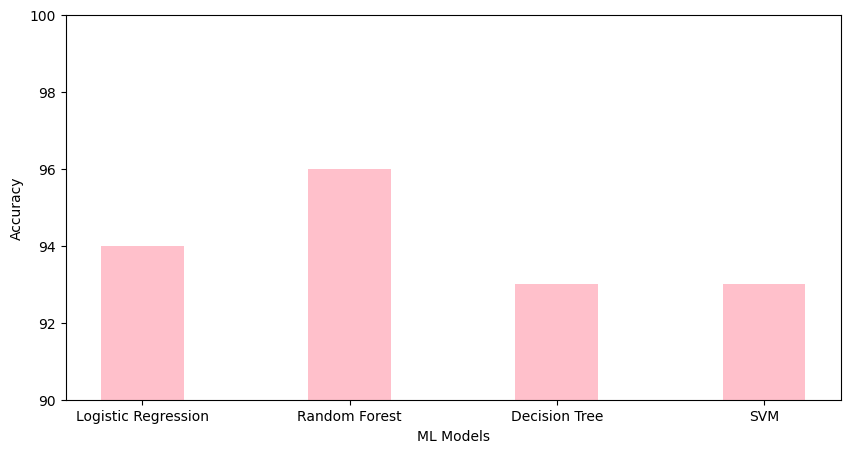

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
data = {'Logistic Regression':94, 'Random Forest':96, 'Decision Tree':93, 'SVM':93}
models = list(data.keys())
accuracy = list(data.values())

fig = plt.figure(figsize=(10, 5))

# creating the bar plot
plt.bar(models, accuracy, color='pink', width=0.4)
plt.ylim([90, 100])  # set the y-axis limits

plt.xlabel("ML Models")
plt.ylabel("Accuracy")
plt.show()
